<a href="https://colab.research.google.com/github/Dee0802/MLnow_2.0/blob/main/univariate_gs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
cd /content/drive/MyDrive/student


/content/drive/MyDrive/student


In [16]:
ls

cleanedMathData.csv  student-merge.R  univariate_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


In [17]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [18]:
mathData = pd.read_csv('student-mat.csv', sep=';')

In [19]:
mathData.shape

(395, 33)

In [20]:

mathData.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [21]:
mathData.corr(
  
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [22]:
mathData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [23]:
print(f'school: {mathData.school.unique()}')
print(f'sex: {mathData.sex.unique()}')
print(f'address: {mathData.address.unique()}')
print(f'Mjob: {mathData.Mjob.unique()}')
print(f'Fjob: {mathData.Fjob.unique()}')
print(f'higher: {mathData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [24]:
mathData['school'] = mathData['school'].apply({'GP':1,'MS':0}.get)
mathData['sex'] = mathData['sex'].apply({'F':1, 'M':0}.get)
mathData['address'] = mathData['address'].apply({'U':0,'R':1}.get)
mathData['address'] = mathData['address'].apply({'U':1, 'R':0}.get)
mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':0}.get)


#multi-valued
mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

mathData.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,None,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,1,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,None,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,1,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,None,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,None,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,None,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,1,no,no,4,3,2,1,2,5,4,6,10,10
5,1,0,16,None,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,0,16,None,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,1,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,1,17,None,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,1,no,no,4,1,4,1,1,1,6,6,5,6
8,1,0,15,None,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,yes,no,yes,1,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,0,15,None,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,5,1,1,1,5,0,14,15,15


In [25]:
mathData = mathData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]

In [26]:
mathData.to_csv('cleanedMathData.csv')

In [27]:
ls

cleanedMathData.csv  student-merge.R  univariate_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


In [28]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [29]:
uniMathData.to_csv('univariate_MathData_2.csv')

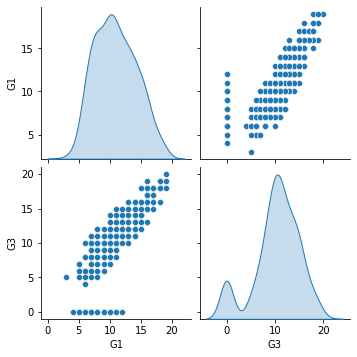

In [30]:
sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

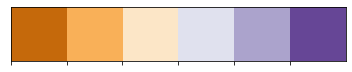

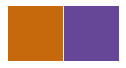

In [55]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes


In [31]:
traindata=uniMathData.sample(frac=0.8,random_state=0)
testdata=uniMathData.drop(traindata.index)

print(traindata.head())
print(testdata.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [32]:
print(traindata.shape)
print(testdata.shape)

(316, 2)
(79, 2)


In [33]:
trainfeatures=traindata.copy()
testfeatures=testdata.copy()

print(trainfeatures.head())
print(testfeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [34]:
trainlabels=trainfeatures.pop('G3')
testlabels=testfeatures.pop('G3')


print(trainfeatures.head())
print(testfeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [35]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [36]:
model.compile(loss='mean_absolute_error',
# optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'],
    optimizer=tf.keras.optimizers.Adam(0.001))

In [37]:
numepochs=300
history=model.fit(x=trainfeatures,y=trainlabels,validation_data=(testfeatures,testlabels),epochs=numepochs)

Epoch 1/300
10/10 [==============================] - 1s 23ms/step - loss: 14.9555 - mae: 14.9555 - mse: 256.7182 - val_loss: 15.7455 - val_mae: 15.7455 - val_mse: 282.4886
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 14.8374 - mae: 14.8374 - mse: 252.8551 - val_loss: 15.6211 - val_mae: 15.6211 - val_mse: 278.2186
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 14.7199 - mae: 14.7199 - mse: 249.0389 - val_loss: 15.4964 - val_mae: 15.4964 - val_mse: 273.9712
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 14.6024 - mae: 14.6024 - mse: 245.2844 - val_loss: 15.3716 - val_mae: 15.3716 - val_mse: 269.7557
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 14.4848 - mae: 14.4848 - mse: 241.5495 - val_loss: 15.2469 - val_mae: 15.2469 - val_mse: 265.5793
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 14.3663 - mae: 14.3663 - mse: 237.7829 - val_loss: 15.1229 - val_mae: 1

In [38]:
print(history)

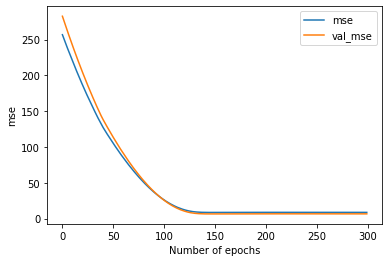

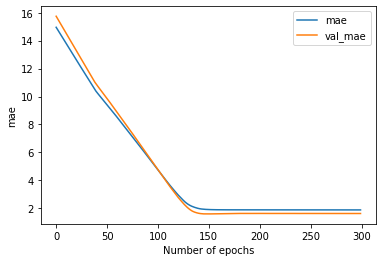

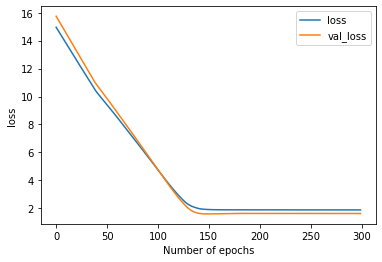

In [41]:
def curveplots(string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([string,f'val_{string}'])
  plt.show()
curveplots('mse')
curveplots('mae')
curveplots('loss')

  

In [42]:

model.predict([1])

array([[2.0550745]], dtype=float32)

In [43]:
#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.0550745]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.0550745]
 [2.95888  ]
 [3.8626852]
 [4.766491 ]
 [5.670296 ]]

List of Predictions (flattened out):
[2.0550745 2.95888   3.8626852 4.766491  5.670296 ]



In [45]:
print(testfeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [49]:
testPreds = model.predict(testfeatures).flatten() 
print(len(testPreds))
print(testPreds)

79
[13.804545   6.5741014 11.093129  16.515963  16.515963  11.996934
 13.804545  18.323574  18.323574   8.381713  13.804545  12.90074
  8.381713   7.477907   9.285518  12.90074   11.093129  15.612156
  7.477907  10.189323  14.70835   12.90074   13.804545  15.612156
  7.477907   7.477907   8.381713  10.189323  11.996934  10.189323
 11.996934  12.90074   10.189323   6.5741014  9.285518  11.996934
  7.477907   8.381713  13.804545   9.285518   9.285518   7.477907
 11.996934   6.5741014 12.90074    7.477907   7.477907  11.093129
 12.90074   16.515963  11.996934  14.70835    9.285518  11.996934
 14.70835   11.996934  14.70835   11.996934  14.70835   11.093129
 11.996934   8.381713  15.612156   7.477907  15.612156  11.093129
 15.612156  12.90074    8.381713   8.381713  11.996934  17.419767
 12.90074   15.612156  10.189323   7.477907  10.189323   7.477907
 11.093129 ]


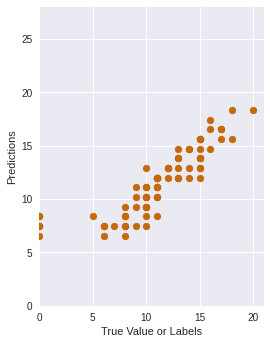

In [56]:

# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testlabels, testPreds)

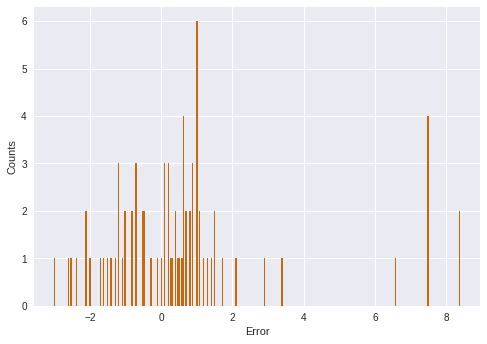

In [57]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testlabels, numepochs)